In [76]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [133]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [134]:
#normalise values
x_train = x_train / 255
x_test = x_test / 255

In [135]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [136]:
x_train.shape

(40000, 32, 32, 3)

In [137]:
x_test.shape

(10000, 32, 32, 3)

In [138]:
x_val.shape

(10000, 32, 32, 3)

In [8]:
#ANN
ANN = models.Sequential([
        layers.Flatten(input_shape = (32,32,3)),
        layers.Dense(3000, activation = "relu"),
        layers.Dense(1000, activation = "relu"),
        layers.Dense(10, activation = "sigmoid")
    ])

#Using sparse as multi categorical and there can only be one value as a result.
ANN.compile(optimizer = "SGD",
               loss = "sparse_categorical_crossentropy",
               metrics = ["accuracy"])

ANNt = ANN.fit(x_train, y_train, epochs = 10, 
               validation_data = (x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 29s 23ms/step - loss: 1.8396 - accuracy: 0.3433 - val_loss: 1.6962 - val_accuracy: 0.4044
Epoch 2/10
1250/1250 [==============================] - 29s 23ms/step - loss: 1.6527 - accuracy: 0.4182 - val_loss: 1.6081 - val_accuracy: 0.4363
Epoch 3/10
1250/1250 [==============================] - 28s 23ms/step - loss: 1.5727 - accuracy: 0.4466 - val_loss: 1.5856 - val_accuracy: 0.4334
Epoch 4/10
1250/1250 [==============================] - 28s 23ms/step - loss: 1.5133 - accuracy: 0.4672 - val_loss: 1.5334 - val_accuracy: 0.4568
Epoch 5/10
1250/1250 [==============================] - 28s 23ms/step - loss: 1.4656 - accuracy: 0.4867 - val_loss: 1.5057 - val_accuracy: 0.4671
Epoch 6/10
1250/1250 [==============================] - 29s 23ms/step - loss: 1.4251 - accuracy: 0.4989 - val_loss: 1.4678 - val_accuracy: 0.4791
Epoch 7/10
1250/1250 [==============================] - 29s 23ms/step - loss: 1.3846 - accuracy: 0.5145 - val_loss: 1.4289 -

In [9]:
ANNe = ANN.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.4127 - accuracy: 0.5015


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ANN.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1000
           1       0.61      0.64      0.63      1000
           2       0.43      0.34      0.38      1000
           3       0.32      0.46      0.37      1000
           4       0.56      0.30      0.39      1000
           5       0.33      0.53      0.41      1000
           6       0.62      0.45      0.52      1000
           7       0.63      0.53      0.57      1000
           8       0.68      0.56      0.62      1000
           9       0.50      0.65      0.57      1000

    accuracy                           0.50     10000
   macro avg       0.53      0.50      0.50     10000
weighted avg       0.53      0.50      0.50     10000



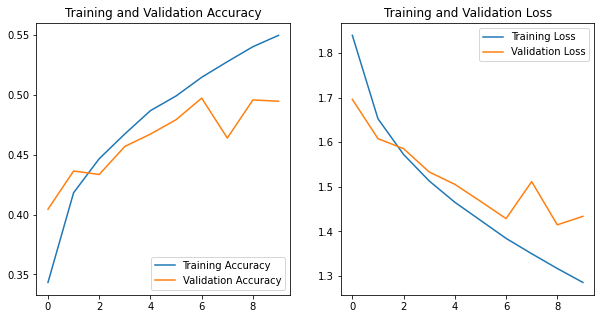

In [11]:
#plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ANNt.history['accuracy'], label='Training Accuracy')
plt.plot(ANNt.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ANNt.history['loss'], label='Training Loss')
plt.plot(ANNt.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [202]:
ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
#CNN - 1 Convulational Layer
CNN = models.Sequential([
        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation = "relu"),
        layers.Dense(10, activation = "softmax") #softmax normalises
    ])

In [13]:
CNN.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [14]:
CNNto = CNN.fit(x_train, y_train, epochs = 10, 
               validation_data = (x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 16s 12ms/step - loss: 1.5473 - accuracy: 0.4466 - val_loss: 1.3598 - val_accuracy: 0.5232
Epoch 2/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2434 - accuracy: 0.5612 - val_loss: 1.2650 - val_accuracy: 0.5579
Epoch 3/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1248 - accuracy: 0.6068 - val_loss: 1.1448 - val_accuracy: 0.6005
Epoch 4/10
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0399 - accuracy: 0.6377 - val_loss: 1.1010 - val_accuracy: 0.6261
Epoch 5/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9770 - accuracy: 0.6592 - val_loss: 1.1246 - val_accuracy: 0.6051
Epoch 6/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9215 - accuracy: 0.6819 - val_loss: 1.1375 - val_accuracy: 0.6215
Epoch 7/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8805 - accuracy: 0.6928 - val_loss: 1.0350 -

In [15]:
CNN.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.0908 - accuracy: 0.6385


[1.0908068418502808, 0.6384999752044678]

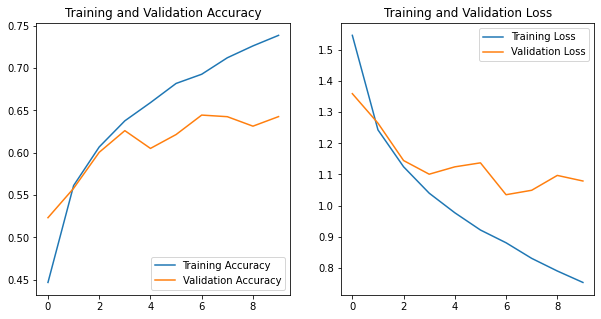

In [16]:
#plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(CNNto.history['accuracy'], label='Training Accuracy')
plt.plot(CNNto.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(CNNto.history['loss'], label='Training Loss')
plt.plot(CNNto.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [201]:
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_3 (Dense)             (None, 64)                921664    
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 924106 (3.53 MB)
Trainable params: 924106 (3.53 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [17]:
#CNN - 3 Convulational Layers
CNNt = models.Sequential([
        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(filters = 256, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation = "relu"),
        layers.Dense(10, activation = "softmax") #softmax normalises
    ])

In [18]:
CNNt.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [19]:
CNNtP = CNNt.fit(x_train, y_train, epochs = 10,
                 validation_data = (x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 24s 19ms/step - loss: 1.5520 - accuracy: 0.4316 - val_loss: 1.2701 - val_accuracy: 0.5464
Epoch 2/10
1250/1250 [==============================] - 24s 19ms/step - loss: 1.1300 - accuracy: 0.6037 - val_loss: 1.0215 - val_accuracy: 0.6395
Epoch 3/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.9479 - accuracy: 0.6680 - val_loss: 0.9531 - val_accuracy: 0.6756
Epoch 4/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.8245 - accuracy: 0.7114 - val_loss: 0.9357 - val_accuracy: 0.6742
Epoch 5/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.7176 - accuracy: 0.7505 - val_loss: 0.8531 - val_accuracy: 0.7105
Epoch 6/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.6265 - accuracy: 0.7814 - val_loss: 0.8423 - val_accuracy: 0.7201
Epoch 7/10
1250/1250 [==============================] - 24s 19ms/step - loss: 0.5507 - accuracy: 0.8080 - val_loss: 0.8580 -

In [20]:
CNNt.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9970 - accuracy: 0.7121


[0.9969578981399536, 0.7121000289916992]

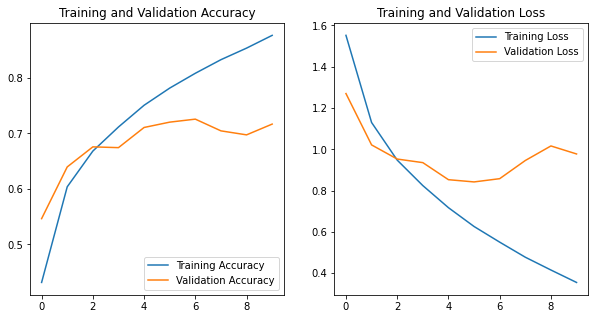

In [21]:
#plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(CNNtP.history['accuracy'], label='Training Accuracy')
plt.plot(CNNtP.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(CNNtP.history['loss'], label='Training Loss')
plt.plot(CNNtP.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [200]:
CNNt.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 256)        

In [142]:
#CNN - 3 Convulational Layers w/ dropout
CNNd = models.Sequential([
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),    
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),
        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),
        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),    
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),
        layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),    
        layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation = "relu", kernel_initializer = "he_uniform"),
        layers.Dense(10, activation = "softmax") #softmax normalises
    ])

CNNd.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [143]:
CNNdT = CNNd.fit(x_train, y_train, epochs = 100, 
                 validation_data = (x_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 53s 42ms/step - loss: 1.7140 - accuracy: 0.3629 - val_loss: 1.3121 - val_accuracy: 0.5070
Epoch 2/100
1250/1250 [==============================] - 52s 42ms/step - loss: 1.2958 - accuracy: 0.5303 - val_loss: 1.1546 - val_accuracy: 0.5810
Epoch 3/100
1250/1250 [==============================] - 52s 42ms/step - loss: 1.1107 - accuracy: 0.6021 - val_loss: 0.9121 - val_accuracy: 0.6731
Epoch 4/100
1250/1250 [==============================] - 52s 42ms/step - loss: 0.9986 - accuracy: 0.6443 - val_loss: 0.8648 - val_accuracy: 0.6883
Epoch 5/100
1250/1250 [==============================] - 52s 42ms/step - loss: 0.9295 - accuracy: 0.6714 - val_loss: 0.8058 - val_accuracy: 0.7126
Epoch 6/100
1250/1250 [==============================] - 52s 42ms/step - loss: 0.8832 - accuracy: 0.6867 - val_loss: 0.7890 - val_accuracy: 0.7282
Epoch 7/100
1250/1250 [==============================] - 52s 42ms/step - loss: 0.8495 - accuracy: 0.6992 - val_loss: 0

1250/1250 [==============================] - 52s 41ms/step - loss: 0.5538 - accuracy: 0.8117 - val_loss: 0.5686 - val_accuracy: 0.8089
Epoch 57/100
1250/1250 [==============================] - 52s 41ms/step - loss: 0.5568 - accuracy: 0.8083 - val_loss: 0.5816 - val_accuracy: 0.8081
Epoch 58/100
1250/1250 [==============================] - 52s 41ms/step - loss: 0.5524 - accuracy: 0.8103 - val_loss: 0.6222 - val_accuracy: 0.7947
Epoch 59/100
1250/1250 [==============================] - 52s 41ms/step - loss: 0.5579 - accuracy: 0.8104 - val_loss: 0.5621 - val_accuracy: 0.8159
Epoch 60/100
1250/1250 [==============================] - 52s 41ms/step - loss: 0.5481 - accuracy: 0.8139 - val_loss: 0.6001 - val_accuracy: 0.8034
Epoch 61/100
1250/1250 [==============================] - 52s 41ms/step - loss: 0.5394 - accuracy: 0.8164 - val_loss: 0.6043 - val_accuracy: 0.8029
Epoch 62/100
1250/1250 [==============================] - 52s 41ms/step - loss: 0.5531 - accuracy: 0.8136 - val_loss: 0.6126 

In [144]:
CNNd.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5928 - accuracy: 0.8206


[0.592810869216919, 0.8205999732017517]

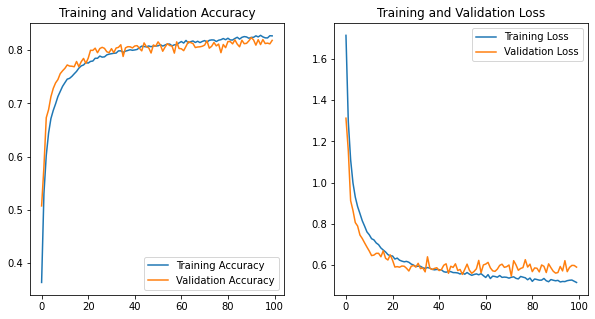

In [145]:
#plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(CNNdT.history['accuracy'], label='Training Accuracy')
plt.plot(CNNdT.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(CNNdT.history['loss'], label='Training Loss')
plt.plot(CNNdT.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [204]:
CNNd.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [168]:
#CNN - 3 Convulational Layers w/ dropout
CNNdb = models.Sequential([
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),    
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.2),
        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),    
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),
        layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),    
        layers.BatchNormalization(),
        layers.Conv2D(filters = 128, kernel_size = (3,3), activation = "relu", kernel_initializer= "he_uniform", padding= "same", input_shape = (32,32,3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(128, activation = "relu", kernel_initializer = "he_uniform"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation = "softmax") #softmax normalises
    ])

CNNdb.compile(optimizer = "adam",
            loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])

In [169]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5),
             ModelCheckpoint(filepath = 'saved_model\\my_model', monitor = 'val_loss', verbose = 1, save_best_only=True)]

CNNdbT = CNNdb.fit(x_train, y_train, epochs = 300, 
                 validation_data = (x_val, y_val), callbacks = callbacks)

Epoch 1/300
1250/1250 [==============================] - ETA: 0s - loss: 1.7089 - accuracy: 0.4114
Epoch 1: val_loss improved from inf to 1.25321, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 71s 55ms/step - loss: 1.7089 - accuracy: 0.4114 - val_loss: 1.2532 - val_accuracy: 0.5578
Epoch 2/300
1250/1250 [==============================] - ETA: 0s - loss: 1.1892 - accuracy: 0.5777
Epoch 2: val_loss improved from 1.25321 to 0.96845, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 68s 55ms/step - loss: 1.1892 - accuracy: 0.5777 - val_loss: 0.9684 - val_accuracy: 0.6602
Epoch 3/300
1250/1250 [==============================] - ETA: 0s - loss: 0.9893 - accuracy: 0.6547
Epoch 3: val_loss improved from 0.96845 to 0.88640, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 77s 62ms/step - loss: 0.9893 - accuracy: 0.6547 - val_loss: 0.8864 - val_accuracy: 0.6832
Epoch 4/300
1250/1250 [==============================] - ETA: 0s - loss: 0.8749 - accuracy: 0.6986
Epoch 4: val_loss improved from 0.88640 to 0.74489, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 77s 61ms/step - loss: 0.8749 - accuracy: 0.6986 - val_loss: 0.7449 - val_accuracy: 0.7379
Epoch 5/300
1250/1250 [==============================] - ETA: 0s - loss: 0.7909 - accuracy: 0.7260
Epoch 5: val_loss improved from 0.74489 to 0.67303, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 77s 62ms/step - loss: 0.7909 - accuracy: 0.7260 - val_loss: 0.6730 - val_accuracy: 0.7655
Epoch 6/300
1250/1250 [==============================] - ETA: 0s - loss: 0.7157 - accuracy: 0.7557
Epoch 6: val_loss did not improve from 0.67303
1250/1250 [==============================] - 78s 62ms/step - loss: 0.7157 - accuracy: 0.7557 - val_loss: 0.7357 - val_accuracy: 0.7454
Epoch 7/300
1250/1250 [==============================] - ETA: 0s - loss: 0.6706 - accuracy: 0.7689
Epoch 7: val_loss improved from 0.67303 to 0.59063, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 88s 70ms/step - loss: 0.6706 - accuracy: 0.7689 - val_loss: 0.5906 - val_accuracy: 0.7999
Epoch 8/300
1250/1250 [==============================] - ETA: 0s - loss: 0.6187 - accuracy: 0.7861
Epoch 8: val_loss improved from 0.59063 to 0.56028, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 85s 68ms/step - loss: 0.6187 - accuracy: 0.7861 - val_loss: 0.5603 - val_accuracy: 0.8090
Epoch 9/300
1250/1250 [==============================] - ETA: 0s - loss: 0.5811 - accuracy: 0.8006
Epoch 9: val_loss did not improve from 0.56028
1250/1250 [==============================] - 85s 68ms/step - loss: 0.5811 - accuracy: 0.8006 - val_loss: 0.5704 - val_accuracy: 0.8066
Epoch 10/300
1250/1250 [==============================] - ETA: 0s - loss: 0.5555 - accuracy: 0.8109
Epoch 10: val_loss did not improve from 0.56028
1250/1250 [==============================] - 85s 68ms/step - loss: 0.5555 - accuracy: 0.8109 - val_loss: 0.5736 - val_accuracy: 0.8036
Epoch 11/300
1250/1250 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.8214
Epoch 11: val_loss improved from 0.56028 to 0.52505, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 87s 69ms/step - loss: 0.5248 - accuracy: 0.8214 - val_loss: 0.5251 - val_accuracy: 0.8196
Epoch 12/300
1250/1250 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.8299
Epoch 12: val_loss improved from 0.52505 to 0.49206, saving model to saved_model\my_model
INFO:tensorflow:Assets written to: saved_model\my_model\assets


INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 81s 65ms/step - loss: 0.4971 - accuracy: 0.8299 - val_loss: 0.4921 - val_accuracy: 0.8322
Epoch 13/300
1250/1250 [==============================] - ETA: 0s - loss: 0.4792 - accuracy: 0.8377
Epoch 13: val_loss did not improve from 0.49206
1250/1250 [==============================] - 78s 63ms/step - loss: 0.4792 - accuracy: 0.8377 - val_loss: 0.5073 - val_accuracy: 0.8271
Epoch 14/300
1250/1250 [==============================] - ETA: 0s - loss: 0.4657 - accuracy: 0.8425
Epoch 14: val_loss did not improve from 0.49206
1250/1250 [==============================] - 78s 62ms/step - loss: 0.4657 - accuracy: 0.8425 - val_loss: 0.4987 - val_accuracy: 0.8338
Epoch 15/300
1250/1250 [==============================] - ETA: 0s - loss: 0.4388 - accuracy: 0.8490
Epoch 15: val_loss did not improve from 0.49206
1250/1250 [==============================] - 78s 62ms/step - loss: 0.4388 - accuracy: 0.8490 - val_loss: 0.5370 - val_accuracy: 0.8239
Epoch 16/300
125

INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 80s 64ms/step - loss: 0.4270 - accuracy: 0.8538 - val_loss: 0.4649 - val_accuracy: 0.8441
Epoch 17/300
1250/1250 [==============================] - ETA: 0s - loss: 0.4077 - accuracy: 0.8604
Epoch 17: val_loss did not improve from 0.46490
1250/1250 [==============================] - 77s 61ms/step - loss: 0.4077 - accuracy: 0.8604 - val_loss: 0.4713 - val_accuracy: 0.8442
Epoch 18/300
1250/1250 [==============================] - ETA: 0s - loss: 0.4039 - accuracy: 0.8606
Epoch 18: val_loss did not improve from 0.46490
1250/1250 [==============================] - 77s 61ms/step - loss: 0.4039 - accuracy: 0.8606 - val_loss: 0.4932 - val_accuracy: 0.8387
Epoch 19/300
1250/1250 [==============================] - ETA: 0s - loss: 0.3815 - accuracy: 0.8682
Epoch 19: val_loss did not improve from 0.46490
1250/1250 [==============================] - 77s 61ms/step - loss: 0.3815 - accuracy: 0.8682 - val_loss: 0.5012 - val_accuracy: 0.8381
Epoch 20/300
125

INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 79s 63ms/step - loss: 0.3666 - accuracy: 0.8748 - val_loss: 0.4603 - val_accuracy: 0.8490
Epoch 22/300
1250/1250 [==============================] - ETA: 0s - loss: 0.3528 - accuracy: 0.8795
Epoch 22: val_loss did not improve from 0.46026
1250/1250 [==============================] - 77s 62ms/step - loss: 0.3528 - accuracy: 0.8795 - val_loss: 0.4763 - val_accuracy: 0.8481
Epoch 23/300
1250/1250 [==============================] - ETA: 0s - loss: 0.3427 - accuracy: 0.8814
Epoch 23: val_loss did not improve from 0.46026
1250/1250 [==============================] - 77s 62ms/step - loss: 0.3427 - accuracy: 0.8814 - val_loss: 0.5244 - val_accuracy: 0.8350
Epoch 24/300
1250/1250 [==============================] - ETA: 0s - loss: 0.3335 - accuracy: 0.8855
Epoch 24: val_loss did not improve from 0.46026
1250/1250 [==============================] - 77s 62ms/step - loss: 0.3335 - accuracy: 0.8855 - val_loss: 0.4629 - val_accuracy: 0.8508
Epoch 25/300
125

INFO:tensorflow:Assets written to: saved_model\my_model\assets


1250/1250 [==============================] - 79s 63ms/step - loss: 0.3278 - accuracy: 0.8880 - val_loss: 0.4586 - val_accuracy: 0.8526
Epoch 26/300
1250/1250 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.8922
Epoch 26: val_loss did not improve from 0.45861
1250/1250 [==============================] - 88s 70ms/step - loss: 0.3154 - accuracy: 0.8922 - val_loss: 0.4865 - val_accuracy: 0.8476
Epoch 27/300
1250/1250 [==============================] - ETA: 0s - loss: 0.3113 - accuracy: 0.8938
Epoch 27: val_loss did not improve from 0.45861
1250/1250 [==============================] - 88s 70ms/step - loss: 0.3113 - accuracy: 0.8938 - val_loss: 0.4604 - val_accuracy: 0.8534
Epoch 28/300
1250/1250 [==============================] - ETA: 0s - loss: 0.2986 - accuracy: 0.8968
Epoch 28: val_loss did not improve from 0.45861
1250/1250 [==============================] - 88s 70ms/step - loss: 0.2986 - accuracy: 0.8968 - val_loss: 0.4655 - val_accuracy: 0.8545
Epoch 29/300
125

In [174]:
predictions = CNNdb.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.4850 - accuracy: 0.8532


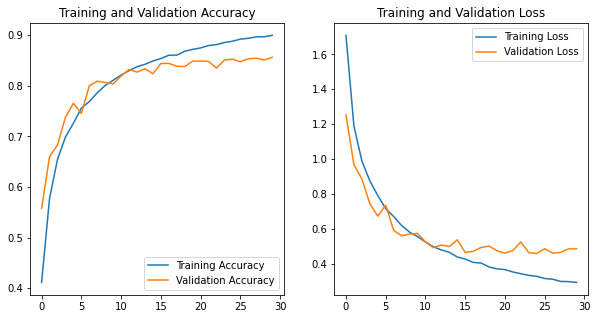

In [171]:
#plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(CNNdbT.history['accuracy'], label='Training Accuracy')
plt.plot(CNNdbT.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(CNNdbT.history['loss'], label='Training Loss')
plt.plot(CNNdbT.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [203]:
CNNdb.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_56 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_65 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_57 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     

In [194]:
y_test = y_test.reshape(-1,)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

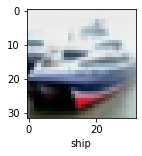

In [188]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])



plot_sample(x_test,y_test,1)

In [193]:
y_pred = CNNdb.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

313/313 [==============================] - 5s 17ms/step


[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

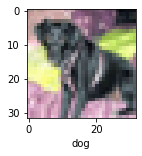

In [197]:
plot_sample(x_test, y_test, 2017)

In [198]:
classes[y_classes[2017]]

'bird'

In [225]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')


In [221]:
predictions = CNNdb.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [223]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


IndexError: invalid index to scalar variable.

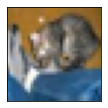

In [226]:
# Display some of the test images, their predicted labels, and the true labels.
# Correct predictions are in blue and incorrect predictions are in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [227]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = CNNdb.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1000
           1       0.81      0.97      0.88      1000
           2       0.73      0.79      0.76      1000
           3       0.79      0.57      0.66      1000
           4       0.83      0.81      0.82      1000
           5       0.88      0.59      0.71      1000
           6       0.70      0.94      0.80      1000
           7       0.85      0.88      0.86      1000
           8       0.91      0.87      0.89      1000
           9       0.84      0.91      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

